In [2]:
import json
import pandas as pd
import re
import string
import seaborn as sns

In [3]:
data_path = "../dataset/Corona2.json"

with open(data_path,"r") as f:
    data = json.load(f)

In [4]:
data['examples'][1]['content']

'Diarrhea, also spelled diarrhoea, is the condition of having at least three loose, liquid, or watery bowel movements each day.[2] It often lasts for a few days and can result in dehydration due to fluid loss.[2] Signs of dehydration often begin with loss of the normal stretchiness of the skin and irritable behaviour.[2] This can progress to decreased urination, loss of skin color, a fast heart rate, and a decrease in responsiveness as it becomes more severe.[2] Loose but non-watery stools in babies who are exclusively breastfed, however, are normal.[2]'

In [170]:
len(data['examples'])

31

In [171]:
data['examples'][1]['annotations'][0]

{'id': '28601a42-c8a9-44e2-aeea-8939cb1db1a9',
 'tag_id': '03eb3e50-d4d8-4261-a60b-fa5aee5deb4a',
 'end': 382,
 'start': 364,
 'example_id': '487c93e3-0d45-4088-a378-cf3a01c8953d',
 'tag_name': 'MedicalCondition',
 'value': 'loss of skin color',
 'correct': None,
 'human_annotations': [{'timestamp': '2020-03-21T00:23:08.961000Z',
   'annotator_id': 1,
   'tagged_token_id': '28601a42-c8a9-44e2-aeea-8939cb1db1a9',
   'name': 'Ashpat123',
   'reason': 'exploration'}],
 'model_annotations': []}

In [172]:
tags = []
for annots in data['examples']:
    annotations = [annotation['tag_name'] for annotation in annots['annotations']]
    tags.extend(annotations)

tags = list(set(tags))
tags

['MedicalCondition', 'Medicine', 'Pathogen']

In [173]:
bio_tags = []
for tag in tags:
    bio_tags.append(f"B-{tag}")
    bio_tags.append(f"I-{tag}")
bio_tags

['B-MedicalCondition',
 'I-MedicalCondition',
 'B-Medicine',
 'I-Medicine',
 'B-Pathogen',
 'I-Pathogen']

In [247]:
for annots in data['examples']:
    for annotation in annots['annotations']:
        if annotation['value'] == ' ':
            print(annotation)
            break
        print(annotation['value'],annotation['tag_name'])
    break

Diosmectite Medicine
aluminomagnesium silicate Medicine
diarrhea MedicalCondition
kaopectate Medicine
bismuth compounds Medicine
Pepto-Bismol Medicine
diarrhea  MedicalCondition
chemotherapy Medicine
constipation MedicalCondition
loperamide Medicine
diarrhea MedicalCondition
flatulence MedicalCondition
loperamide Medicine
{'id': 'a0a03c7b-cfad-41ee-9f5c-f8a802475994', 'tag_id': '03eb3e50-d4d8-4261-a60b-fa5aee5deb4a', 'end': 853, 'start': 852, 'example_id': '18c2f619-f102-452f-ab81-d26f7e283ffe', 'tag_name': 'MedicalCondition', 'value': ' ', 'correct': None, 'human_annotations': [], 'model_annotations': []}


In [222]:
df_new = pd.DataFrame(columns=['id','content','labels'])
for annots in data['examples']:
    # print(f"{annots['id']}: {annots['content']}")
    labels = {annotation['value']:annotation['tag_name'] for annotation in annots['annotations']}
    # print("\n")
    # print(labels)
    new_labels = {}
    for label in labels:
        if len(label.split()) > 1:
            # i = 0
            for i,word in enumerate(label.split()):
                if i == 0:
                    new_labels[word] = f"B-{labels[label]}"
                else:
                    new_labels[word] = f"I-{labels[label]}"
        else:
            new_labels[label] = f"B-{labels[label]}"

    new_row = {'id': annots['id'], 'content': annots['content'], 'labels':new_labels}

    # Append the new row to the dataframe
    df_new.loc[len(df_new)] = new_row

In [223]:
df.head()

,id,content,labels
0,18c2f619-f102-452f-ab81-d26f7e283ffe,While bismuth compounds (Pepto-Bismol) decreas...,"{'Diosmectite': 'B-Medicine', 'aluminomagnesiu..."
1,487c93e3-0d45-4088-a378-cf3a01c8953d,"Diarrhea, also spelled diarrhoea, is the condi...","{'loss': 'B-MedicalCondition', 'of': 'I-Medica..."
2,d5056874-895a-4a7f-9e0f-828d414d65d9,Antiretroviral therapy (ART) is recommended fo...,"{'Antiretroviral': 'B-Medicine', 'therapy': 'I..."
3,20c792c7-0c4b-42d0-8127-0e04113db384,The following drugs are considered as DMARDs: ...,"{'[8][5][93]': 'B-MedicalCondition', 'A': 'I-M..."
4,f5359e0d-4d4a-4707-95a3-4c627fc4a83b,"The goals of treatment are to reduce pain, dec...","{'methotrexate': 'B-Medicine', 'hydroxychloroq..."


In [224]:
from nltk.tokenize import word_tokenize

text = '''While bismuth compounds (Pepto-Bismol) decreased the number of bowel movements in those with travelers' diarrhea, they do not decrease the length of illness.[91] Anti-motility agents like loperamide are also effective at reducing the number of stools but not the duration of disease.[8] These agents should be used only if bloody diarrhea is not present.[92]

Diosmectite, a natural aluminomagnesium silicate clay, is effective in alleviating symptoms of acute diarrhea in children,[93] and also has some effects in chronic functional diarrhea, radiation-induced diarrhea, and chemotherapy-induced diarrhea.[45] Another absorbent agent used for the treatment of mild diarrhea is kaopectate.

Racecadotril an antisecretory medication may be used to treat diarrhea in children and adults.[86] It has better tolerability than loperamide, as it causes less constipation and flatulence.[94]'''

word_tokenize(text)

['While',
 'bismuth',
 'compounds',
 '(',
 'Pepto-Bismol',
 ')',
 'decreased',
 'the',
 'number',
 'of',
 'bowel',
 'movements',
 'in',
 'those',
 'with',
 'travelers',
 "'",
 'diarrhea',
 ',',
 'they',
 'do',
 'not',
 'decrease',
 'the',
 'length',
 'of',
 'illness',
 '.',
 '[',
 '91',
 ']',
 'Anti-motility',
 'agents',
 'like',
 'loperamide',
 'are',
 'also',
 'effective',
 'at',
 'reducing',
 'the',
 'number',
 'of',
 'stools',
 'but',
 'not',
 'the',
 'duration',
 'of',
 'disease',
 '.',
 '[',
 '8',
 ']',
 'These',
 'agents',
 'should',
 'be',
 'used',
 'only',
 'if',
 'bloody',
 'diarrhea',
 'is',
 'not',
 'present',
 '.',
 '[',
 '92',
 ']',
 'Diosmectite',
 ',',
 'a',
 'natural',
 'aluminomagnesium',
 'silicate',
 'clay',
 ',',
 'is',
 'effective',
 'in',
 'alleviating',
 'symptoms',
 'of',
 'acute',
 'diarrhea',
 'in',
 'children',
 ',',
 '[',
 '93',
 ']',
 'and',
 'also',
 'has',
 'some',
 'effects',
 'in',
 'chronic',
 'functional',
 'diarrhea',
 ',',
 'radiation-induced',
 'd

In [225]:
def split_sentence(sentence):
    """
    Splits a sentence into a list of words while preserving words enclosed within brackets and detects 'None' values.

    Args:
        sentence (str): The sentence to split.

    Returns:
        list: A list of words.
    """
    words = re.split(r'((?<=\[)[^\]]+(?=\]))|[,.;:\s0-9]+', sentence)

    # Check for 'None' values and print warning messages
    for word in words:
        if word is None:
            print(f"Warning: 'None' value encountered in sentence: '{sentence}'")

    # Remove 'None' values from the list
    words = [word for word in words if word is not None]

    # Apply rstrip() to non-None values
    words = [word.rstrip() for word in words]

    return words

In [226]:
def remove_pattern(text):
    # Regular expression to match any number within brackets
    pattern_regex = re.compile('\[\d+\]')

    # Replace the pattern with an empty string
    text_without_pattern = pattern_regex.sub('', text)

    return text_without_pattern

<>:3: SyntaxWarning: invalid escape sequence '\['
<>:3: SyntaxWarning: invalid escape sequence '\['
/var/folders/dm/s7p9m_4j3bgfqrvz0vd81ss40000gn/T/ipykernel_8321/2758500181.py:3: SyntaxWarning: invalid escape sequence '\['
  pattern_regex = re.compile('\[\d+\]')


In [227]:
def remove_punctuation(text):
    # Regular expression to match punctuation characters
    punctuation_regex = re.compile('[\\.,!?\'\"]')

    # Replace punctuation characters with an empty string
    text_without_punctuation = punctuation_regex.sub('', text)

    return text_without_punctuation

In [228]:
df_new['content'] = df_new['content'].apply(remove_pattern)
df_new['content'] = df_new['content'].apply(remove_punctuation)

In [229]:
df_new['sentence'] = df_new['content'].apply(split_sentence)


Diosmectite a natural aluminomagnesium silicate clay is effective in alleviating symptoms of acute diarrhea in children and also has some effects in chronic functional diarrhea radiation-induced diarrhea and chemotherapy-induced diarrhea Another absorbent agent used for the treatment of mild diarrhea is kaopectate

Racecadotril an antisecretory medication may be used to treat diarrhea in children and adults It has better tolerability than loperamide as it causes less constipation and flatulence'

Diosmectite a natural aluminomagnesium silicate clay is effective in alleviating symptoms of acute diarrhea in children and also has some effects in chronic functional diarrhea radiation-induced diarrhea and chemotherapy-induced diarrhea Another absorbent agent used for the treatment of mild diarrhea is kaopectate

Racecadotril an antisecretory medication may be used to treat diarrhea in children and adults It has better tolerability than loperamide as it causes less constipation and flatulen

In [230]:
df.head()

,id,content,labels,sentence
0,18c2f619-f102-452f-ab81-d26f7e283ffe,While bismuth compounds (Pepto-Bismol) decreas...,"{'Diosmectite': 'B-Medicine', 'aluminomagnesiu...","[While, bismuth, compounds, (Pepto-Bismol), de..."
1,487c93e3-0d45-4088-a378-cf3a01c8953d,Diarrhea also spelled diarrhoea is the conditi...,"{'loss': 'B-MedicalCondition', 'of': 'I-Medica...","[Diarrhea, also, spelled, diarrhoea, is, the, ..."
2,d5056874-895a-4a7f-9e0f-828d414d65d9,Antiretroviral therapy (ART) is recommended fo...,"{'Antiretroviral': 'B-Medicine', 'therapy': 'I...","[Antiretroviral, therapy, (ART), is, recommend..."
3,20c792c7-0c4b-42d0-8127-0e04113db384,The following drugs are considered as DMARDs: ...,"{'[8][5][93]': 'B-MedicalCondition', 'A': 'I-M...","[The, following, drugs, are, considered, as, D..."
4,f5359e0d-4d4a-4707-95a3-4c627fc4a83b,The goals of treatment are to reduce pain decr...,"{'methotrexate': 'B-Medicine', 'hydroxychloroq...","[The, goals, of, treatment, are, to, reduce, p..."


In [219]:
testing = {'Diosmectite': 'Medicine',
 'aluminomagnesium silicate': 'Medicine',
 'diarrhea': 'MedicalCondition',
 'kaopectate': 'Medicine',
 'bismuth compounds': 'Medicine',
 'Pepto-Bismol': 'Medicine',
 'diarrhea ': 'MedicalCondition',
 'chemotherapy': 'Medicine',
 'constipation': 'MedicalCondition',
 'loperamide': 'Medicine',
 'flatulence': 'MedicalCondition',
 ' ': 'MedicalCondition',
 'Racecadotril': 'Medicine'}

new_labels = {}
for label in testing:
    if len(label.split()) > 1:
        # i = 0
        for i,word in enumerate(label.split()):
            if i == 0:
                new_labels[word] = f"B-{testing[label]}"
            else:
                new_labels[word] = f"I-{testing[label]}"
    else:
        new_labels[label] = f"B-{testing[label]}"

new_labels
         


{'Diosmectite': 'B-Medicine',
 'aluminomagnesium': 'B-Medicine',
 'silicate': 'I-Medicine',
 'diarrhea': 'B-MedicalCondition',
 'kaopectate': 'B-Medicine',
 'bismuth': 'B-Medicine',
 'compounds': 'I-Medicine',
 'Pepto-Bismol': 'B-Medicine',
 'diarrhea ': 'B-MedicalCondition',
 'chemotherapy': 'B-Medicine',
 'constipation': 'B-MedicalCondition',
 'loperamide': 'B-Medicine',
 'flatulence': 'B-MedicalCondition',
 ' ': 'B-MedicalCondition',
 'Racecadotril': 'B-Medicine'}

In [218]:
testing

{'Diosmectite': 'Medicine',
 'aluminomagnesium silicate': 'Medicine',
 'diarrhea': 'MedicalCondition',
 'kaopectate': 'Medicine',
 'bismuth compounds': 'Medicine',
 'Pepto-Bismol': 'Medicine',
 'diarrhea ': 'MedicalCondition',
 'chemotherapy': 'Medicine',
 'constipation': 'MedicalCondition',
 'loperamide': 'Medicine',
 'flatulence': 'MedicalCondition',
 ' ': 'MedicalCondition',
 'Racecadotril': 'Medicine'}

In [184]:
tags

['MedicalCondition', 'Medicine', 'Pathogen']

In [185]:
len('praneeth'.split())

1

In [231]:
def create_bio_tags(row):
    BIO = []
    sentence = row['sentence']
    labels = row['labels']
    for word in sentence:
        if word in labels:
            BIO.append(labels[word])
        else:
            BIO.append("O")

    return BIO


In [232]:
df_new['bio_tags'] = df_new.apply(create_bio_tags,axis=1)

In [233]:
df.head()

,id,content,labels,sentence,bio_tags
0,18c2f619-f102-452f-ab81-d26f7e283ffe,While bismuth compounds (Pepto-Bismol) decreas...,"{'Diosmectite': 'B-Medicine', 'aluminomagnesiu...","[While, bismuth, compounds, (Pepto-Bismol), de...","[O, B-Medicine, I-Medicine, O, O, O, O, O, O, ..."
1,487c93e3-0d45-4088-a378-cf3a01c8953d,Diarrhea also spelled diarrhoea is the conditi...,"{'loss': 'B-MedicalCondition', 'of': 'I-Medica...","[Diarrhea, also, spelled, diarrhoea, is, the, ...","[B-MedicalCondition, O, O, B-MedicalCondition,..."
2,d5056874-895a-4a7f-9e0f-828d414d65d9,Antiretroviral therapy (ART) is recommended fo...,"{'Antiretroviral': 'B-Medicine', 'therapy': 'I...","[Antiretroviral, therapy, (ART), is, recommend...","[B-Medicine, I-Medicine, O, O, O, O, O, O, O, ..."
3,20c792c7-0c4b-42d0-8127-0e04113db384,The following drugs are considered as DMARDs: ...,"{'[8][5][93]': 'B-MedicalCondition', 'A': 'I-M...","[The, following, drugs, are, considered, as, D...","[O, O, O, O, O, O, B-Medicine, B-Medicine, B-M..."
4,f5359e0d-4d4a-4707-95a3-4c627fc4a83b,The goals of treatment are to reduce pain decr...,"{'methotrexate': 'B-Medicine', 'hydroxychloroq...","[The, goals, of, treatment, are, to, reduce, p...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."


In [234]:
' '.join(df[['sentence','bio_tags','labels']].iloc[0]['sentence'])

'While bismuth compounds (Pepto-Bismol) decreased the number of bowel movements in those with travelers diarrhea they do not decrease the length of illness Anti-motility agents like loperamide are also effective at reducing the number of stools but not the duration of disease These agents should be used only if bloody diarrhea is not present Diosmectite a natural aluminomagnesium silicate clay is effective in alleviating symptoms of acute diarrhea in children and also has some effects in chronic functional diarrhea radiation-induced diarrhea and chemotherapy-induced diarrhea Another absorbent agent used for the treatment of mild diarrhea is kaopectate Racecadotril an antisecretory medication may be used to treat diarrhea in children and adults It has better tolerability than loperamide as it causes less constipation and flatulence'

In [235]:
"aluminomagnesium" in df[['sentence','bio_tags','labels']].iloc[0]['sentence']

True

In [238]:
df[['sentence','bio_tags']].iloc[0]['sentence'].index("silicate")

58

In [240]:
df[['sentence','bio_tags']].iloc[0]['bio_tags'][59]

'O'

In [242]:
df[['sentence','bio_tags','labels']].iloc[1]['labels']

{'loss': 'B-MedicalCondition',
 'of': 'I-MedicalCondition',
 'skin': 'I-MedicalCondition',
 'color': 'I-MedicalCondition',
 'Diarrhea': 'B-MedicalCondition',
 'watery': 'B-MedicalCondition',
 'bowel': 'I-MedicalCondition',
 'movements': 'I-MedicalCondition',
 'dehydration': 'B-MedicalCondition',
 'diarrhoea': 'B-MedicalCondition',
 'decrease': 'B-MedicalCondition',
 'in': 'I-MedicalCondition',
 'responsiveness': 'I-MedicalCondition',
 'fast': 'B-MedicalCondition',
 'heart': 'I-MedicalCondition',
 'rate': 'I-MedicalCondition'}

In [243]:
df.head()

,id,content,labels,sentence,bio_tags
0,18c2f619-f102-452f-ab81-d26f7e283ffe,While bismuth compounds (Pepto-Bismol) decreas...,"{'Diosmectite': 'B-Medicine', 'aluminomagnesiu...","[While, bismuth, compounds, (Pepto-Bismol), de...","[O, B-Medicine, I-Medicine, O, O, O, O, O, O, ..."
1,487c93e3-0d45-4088-a378-cf3a01c8953d,Diarrhea also spelled diarrhoea is the conditi...,"{'loss': 'B-MedicalCondition', 'of': 'I-Medica...","[Diarrhea, also, spelled, diarrhoea, is, the, ...","[B-MedicalCondition, O, O, B-MedicalCondition,..."
2,d5056874-895a-4a7f-9e0f-828d414d65d9,Antiretroviral therapy (ART) is recommended fo...,"{'Antiretroviral': 'B-Medicine', 'therapy': 'I...","[Antiretroviral, therapy, (ART), is, recommend...","[B-Medicine, I-Medicine, O, O, O, O, O, O, O, ..."
3,20c792c7-0c4b-42d0-8127-0e04113db384,The following drugs are considered as DMARDs: ...,"{'[8][5][93]': 'B-MedicalCondition', 'A': 'I-M...","[The, following, drugs, are, considered, as, D...","[O, O, O, O, O, O, B-Medicine, B-Medicine, B-M..."
4,f5359e0d-4d4a-4707-95a3-4c627fc4a83b,The goals of treatment are to reduce pain decr...,"{'methotrexate': 'B-Medicine', 'hydroxychloroq...","[The, goals, of, treatment, are, to, reduce, p...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."


In [255]:
df[df['id']=="18c2f619-f102-452f-ab81-d26f7e283ffe"]['labels'].values[0]

{'Diosmectite': 'B-Medicine',
 'aluminomagnesium': 'B-Medicine',
 'silicate': 'I-Medicine',
 'diarrhea': 'B-MedicalCondition',
 'kaopectate': 'B-Medicine',
 'bismuth': 'B-Medicine',
 'compounds': 'I-Medicine',
 'Pepto-Bismol': 'B-Medicine',
 'diarrhea ': 'B-MedicalCondition',
 'chemotherapy': 'B-Medicine',
 'constipation': 'B-MedicalCondition',
 'loperamide': 'B-Medicine',
 'flatulence': 'B-MedicalCondition',
 ' ': 'B-MedicalCondition',
 'Racecadotril': 'B-Medicine'}

In [257]:
df.head()

,id,content,labels,sentence,bio_tags
0,18c2f619-f102-452f-ab81-d26f7e283ffe,While bismuth compounds (Pepto-Bismol) decreas...,"{'Diosmectite': 'B-Medicine', 'aluminomagnesiu...","[While, bismuth, compounds, (Pepto-Bismol), de...","[O, B-Medicine, I-Medicine, O, O, O, O, O, O, ..."
1,487c93e3-0d45-4088-a378-cf3a01c8953d,Diarrhea also spelled diarrhoea is the conditi...,"{'loss': 'B-MedicalCondition', 'of': 'I-Medica...","[Diarrhea, also, spelled, diarrhoea, is, the, ...","[B-MedicalCondition, O, O, B-MedicalCondition,..."
2,d5056874-895a-4a7f-9e0f-828d414d65d9,Antiretroviral therapy (ART) is recommended fo...,"{'Antiretroviral': 'B-Medicine', 'therapy': 'I...","[Antiretroviral, therapy, (ART), is, recommend...","[B-Medicine, I-Medicine, O, O, O, O, O, O, O, ..."
3,20c792c7-0c4b-42d0-8127-0e04113db384,The following drugs are considered as DMARDs: ...,"{'[8][5][93]': 'B-MedicalCondition', 'A': 'I-M...","[The, following, drugs, are, considered, as, D...","[O, O, O, O, O, O, B-Medicine, B-Medicine, B-M..."
4,f5359e0d-4d4a-4707-95a3-4c627fc4a83b,The goals of treatment are to reduce pain decr...,"{'methotrexate': 'B-Medicine', 'hydroxychloroq...","[The, goals, of, treatment, are, to, reduce, p...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."


In [259]:
df[['id','sentence','bio_tags']]

,id,sentence,bio_tags
0,18c2f619-f102-452f-ab81-d26f7e283ffe,"[While, bismuth, compounds, (Pepto-Bismol), de...","[O, B-Medicine, I-Medicine, O, O, O, O, O, O, ..."
1,487c93e3-0d45-4088-a378-cf3a01c8953d,"[Diarrhea, also, spelled, diarrhoea, is, the, ...","[B-MedicalCondition, O, O, B-MedicalCondition,..."
2,d5056874-895a-4a7f-9e0f-828d414d65d9,"[Antiretroviral, therapy, (ART), is, recommend...","[B-Medicine, I-Medicine, O, O, O, O, O, O, O, ..."
3,20c792c7-0c4b-42d0-8127-0e04113db384,"[The, following, drugs, are, considered, as, D...","[O, O, O, O, O, O, B-Medicine, B-Medicine, B-M..."
4,f5359e0d-4d4a-4707-95a3-4c627fc4a83b,"[The, goals, of, treatment, are, to, reduce, p...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
5,b3481879-a9cd-48db-8526-8ee11c9a72bc,"[Hantaviruses, usually, found, in, rodents, an...","[B-Pathogen, O, O, O, O, O, O, O, O, O, O, O, ..."
6,8ecb663a-c4d5-4351-9b9c-40f724ff936d,"[Bats, are, the, most, common, source, of, rab...","[O, O, O, O, O, O, O, B-Pathogen, O, O, O, O, ..."
7,f2f13903-be8b-4981-8702-4ee992f90534,"[In, following, the, outbreak, of, severe, acu...","[O, O, O, O, O, B-MedicalCondition, I-MedicalC..."
8,5d1621d3-b877-4747-aceb-ecf807a6c9ec,"[Bacterial, vaginosis, is, caused, by, bacteri...","[B-Pathogen, I-Pathogen, O, O, O, B-Pathogen, ..."
9,9a0b1ede-2282-4dae-b086-638e45881bf5,"[Other, groups, of, intracellular, bacterial, ...","[O, O, O, O, O, O, O, B-Pathogen, B-Pathogen, ..."


In [262]:
{value:key for key,value in enumerate(bio_tags)}

{'B-MedicalCondition': 0,
 'I-MedicalCondition': 1,
 'B-Medicine': 2,
 'I-Medicine': 3,
 'B-Pathogen': 4,
 'I-Pathogen': 5}

In [264]:
df.drop(['id','content','labels'],axis=1)

,sentence,bio_tags
0,"[While, bismuth, compounds, (Pepto-Bismol), de...","[O, B-Medicine, I-Medicine, O, O, O, O, O, O, ..."
1,"[Diarrhea, also, spelled, diarrhoea, is, the, ...","[B-MedicalCondition, O, O, B-MedicalCondition,..."
2,"[Antiretroviral, therapy, (ART), is, recommend...","[B-Medicine, I-Medicine, O, O, O, O, O, O, O, ..."
3,"[The, following, drugs, are, considered, as, D...","[O, O, O, O, O, O, B-Medicine, B-Medicine, B-M..."
4,"[The, goals, of, treatment, are, to, reduce, p...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
5,"[Hantaviruses, usually, found, in, rodents, an...","[B-Pathogen, O, O, O, O, O, O, O, O, O, O, O, ..."
6,"[Bats, are, the, most, common, source, of, rab...","[O, O, O, O, O, O, O, B-Pathogen, O, O, O, O, ..."
7,"[In, following, the, outbreak, of, severe, acu...","[O, O, O, O, O, B-MedicalCondition, I-MedicalC..."
8,"[Bacterial, vaginosis, is, caused, by, bacteri...","[B-Pathogen, I-Pathogen, O, O, O, B-Pathogen, ..."
9,"[Other, groups, of, intracellular, bacterial, ...","[O, O, O, O, O, O, O, B-Pathogen, B-Pathogen, ..."


# CORD Dataset

In [5]:
cord = pd.read_csv("../dataset/ner_covid_final_data_v3.csv")

In [6]:
cord.drop(columns=['Unnamed: 0'],inplace=True)

In [7]:
cord.rename(columns={"0":"Word","1":"Tag","2":"Sentence #"},inplace=True)

In [8]:
cord.head()

,Word,Tag,Sentence #
0,angiotensin-converting,B-GENE_OR_GENOME,1
1,enzyme,I-GENE_OR_GENOME,1
2,2,I-GENE_OR_GENOME,1
3,ace2,B-GENE_OR_GENOME,1
4,as,Other,1


In [9]:
cord.shape

(63308700, 3)

In [10]:
cord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63308700 entries, 0 to 63308699
Data columns (total 3 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Word        object
 1   Tag         object
 2   Sentence #  int64 
dtypes: int64(1), object(2)
memory usage: 1.4+ GB


In [11]:
cord['Sentence #'].nunique()*0.05

25498.0

In [49]:
mini_set = cord[cord['Sentence #']<=48000]

In [50]:
freqs = {}
for tag in list(mini_set['Tag']):
    if tag!="Other":
        if tag not in freqs:
            freqs[tag] = 1
        else:
            freqs[tag] += 1
    else:
        pass

freqs

{'B-GENE_OR_GENOME': 171204,
 'I-GENE_OR_GENOME': 130660,
 'B-CORONAVIRUS': 26687,
 'B-CHEMICAL': 183325,
 'B-EVOLUTION': 9530,
 'B-WILDLIFE': 2237,
 'B-NORP': 4066,
 'I-NORP': 749,
 'B-ORGANISM': 24273,
 'B-EUKARYOTE': 12581,
 'B-PERSON': 12740,
 'I-PERSON': 9188,
 'B-PHYSICAL_SCIENCE': 140,
 'I-PHYSICAL_SCIENCE': 158,
 'I-CHEMICAL': 83779,
 'B-DISEASE_OR_SYNDROME': 71884,
 'I-DISEASE_OR_SYNDROME': 34248,
 'I-ORGANISM': 7905,
 'B-DATE': 59843,
 'B-CARDINAL': 68958,
 'B-MOLECULAR_FUNCTION': 8794,
 'B-EXPERIMENTAL_MODEL_OF_DISEASE': 215,
 'I-EXPERIMENTAL_MODEL_OF_DISEASE': 155,
 'B-CELL': 32433,
 'B-BODY_PART_ORGAN_OR_ORGAN_COMPONENT': 9052,
 'B-LIVESTOCK': 3971,
 'B-ORG': 33569,
 'B-TISSUE': 11826,
 'I-TISSUE': 4322,
 'B-GROUP': 25855,
 'I-CELL': 12463,
 'B-CELL_COMPONENT': 21132,
 'I-CELL_COMPONENT': 6926,
 'B-FOOD': 1010,
 'B-CELL_FUNCTION': 3498,
 'I-DATE': 40172,
 'B-GPE': 17319,
 'B-DAILY_OR_RECREATIONAL_ACTIVITY': 1525,
 'B-BODY_SUBSTANCE': 3293,
 'B-INDIVIDUAL_BEHAVIOR': 981,
 '

<Axes: >

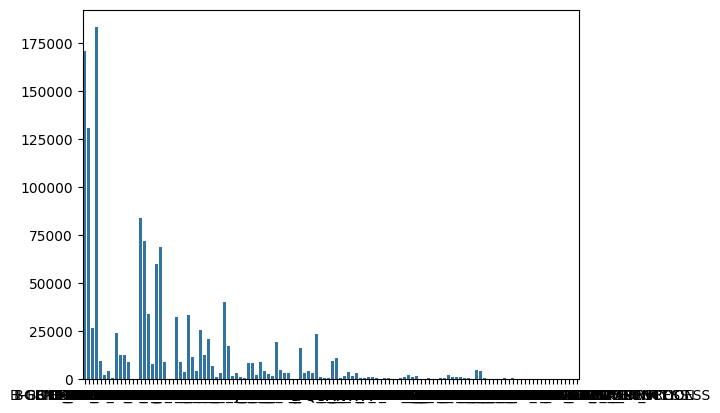

In [51]:
sns.barplot(freqs)

In [52]:
[x for x in list(set([x for x in list(mini_set['Tag'])])) if x.startswith("B-")]

['B-THERAPEUTIC_OR_PREVENTIVE_PROCEDURE',
 'B-TISSUE',
 'B-CORONAVIRUS',
 'B-BODY_PART_ORGAN_OR_ORGAN_COMPONENT',
 'B-MONEY',
 'B-INDIVIDUAL_BEHAVIOR',
 'B-PHYSICAL_SCIENCE',
 'B-SUBSTRATE',
 'B-CELL_COMPONENT',
 'B-SIGN_OR_SYMPTOM',
 'B-GOVERNMENTAL_OR_REGULATORY_ACTIVITY',
 'B-LOC',
 'B-WORK_OF_ART',
 'B-HUMAN-CAUSED_PHENOMENON_OR_PROCESS',
 'B-CHEMICAL',
 'B-DIAGNOSTIC_PROCEDURE',
 'B-MACHINE_ACTIVITY',
 'B-GROUP',
 'B-LABORATORY_OR_TEST_RESULT',
 'B-IMMUNE_RESPONSE',
 'B-QUANTITY',
 'B-WILDLIFE',
 'B-EDUCATIONAL_ACTIVITY',
 'B-EVOLUTION',
 'B-ORDINAL',
 'B-SOCIAL_BEHAVIOR',
 'B-ORGAN_OR_TISSUE_FUNCTION',
 'B-LAW',
 'B-ARCHAEON',
 'B-FOOD',
 'B-ORGANISM',
 'B-NORP',
 'B-VIRAL_PROTEIN',
 'B-GPE',
 'B-GROUP_ATTRIBUTE',
 'B-MOLECULAR_FUNCTION',
 'B-ORG',
 'B-DATE',
 'B-ANATOMICAL_STRUCTURE',
 'B-LANGUAGE',
 'B-EVENT',
 'B-BACTERIUM',
 'B-LABORATORY_PROCEDURE',
 'B-RESEARCH_ACTIVITY',
 'B-PERSON',
 'B-PRODUCT',
 'B-EUKARYOTE',
 'B-MATERIAL',
 'B-EXPERIMENTAL_MODEL_OF_DISEASE',
 'B-TIME'

<Axes: xlabel='Tag', ylabel='count'>

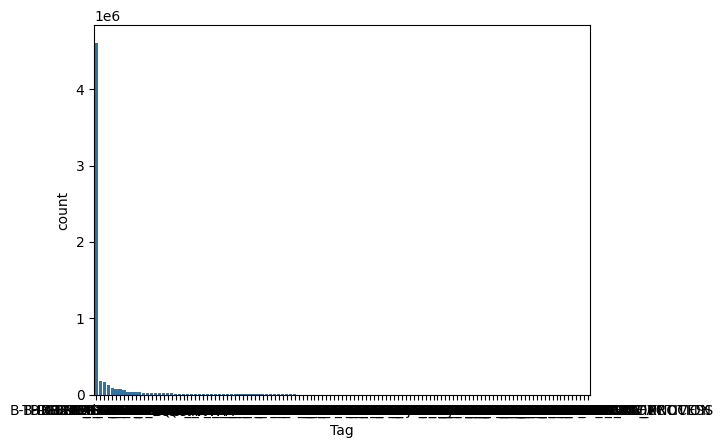

In [53]:
sns.barplot(mini_set['Tag'].value_counts())

In [54]:
final = mini_set.groupby("Sentence #")[["Word","Tag"]].agg(list).reset_index()

In [55]:
[x for x in list(set([x for x in list(mini_set['Tag'])])) if x.startswith("B-")]

['B-THERAPEUTIC_OR_PREVENTIVE_PROCEDURE',
 'B-TISSUE',
 'B-CORONAVIRUS',
 'B-BODY_PART_ORGAN_OR_ORGAN_COMPONENT',
 'B-MONEY',
 'B-INDIVIDUAL_BEHAVIOR',
 'B-PHYSICAL_SCIENCE',
 'B-SUBSTRATE',
 'B-CELL_COMPONENT',
 'B-SIGN_OR_SYMPTOM',
 'B-GOVERNMENTAL_OR_REGULATORY_ACTIVITY',
 'B-LOC',
 'B-WORK_OF_ART',
 'B-HUMAN-CAUSED_PHENOMENON_OR_PROCESS',
 'B-CHEMICAL',
 'B-DIAGNOSTIC_PROCEDURE',
 'B-MACHINE_ACTIVITY',
 'B-GROUP',
 'B-LABORATORY_OR_TEST_RESULT',
 'B-IMMUNE_RESPONSE',
 'B-QUANTITY',
 'B-WILDLIFE',
 'B-EDUCATIONAL_ACTIVITY',
 'B-EVOLUTION',
 'B-ORDINAL',
 'B-SOCIAL_BEHAVIOR',
 'B-ORGAN_OR_TISSUE_FUNCTION',
 'B-LAW',
 'B-ARCHAEON',
 'B-FOOD',
 'B-ORGANISM',
 'B-NORP',
 'B-VIRAL_PROTEIN',
 'B-GPE',
 'B-GROUP_ATTRIBUTE',
 'B-MOLECULAR_FUNCTION',
 'B-ORG',
 'B-DATE',
 'B-ANATOMICAL_STRUCTURE',
 'B-LANGUAGE',
 'B-EVENT',
 'B-BACTERIUM',
 'B-LABORATORY_PROCEDURE',
 'B-RESEARCH_ACTIVITY',
 'B-PERSON',
 'B-PRODUCT',
 'B-EUKARYOTE',
 'B-MATERIAL',
 'B-EXPERIMENTAL_MODEL_OF_DISEASE',
 'B-TIME'

In [56]:
mini_set.shape

(5946542, 3)

In [57]:
final['len'] = final['Word'].apply(lambda x: len(x))

In [58]:
final['len'].min()

1

In [59]:
len(freqs)

124

In [60]:
mini_set[mini_set['Tag']=='B-DATE']

,Word,Tag,Sentence #
123,76,B-DATE,1
703,21],B-DATE,6
832,ace2,B-DATE,7
835,27,B-DATE,7
858,29,B-DATE,7
...,...,...,...
5945144,76,B-DATE,47990
5945299,2005,B-DATE,47991
5945334,migrant,B-DATE,47991
5945972,2008,B-DATE,47996


In [61]:
b_freqs = {key:value for key,value in freqs.items() if key.startswith("B-")}

In [62]:
b_freqs

{'B-GENE_OR_GENOME': 171204,
 'B-CORONAVIRUS': 26687,
 'B-CHEMICAL': 183325,
 'B-EVOLUTION': 9530,
 'B-WILDLIFE': 2237,
 'B-NORP': 4066,
 'B-ORGANISM': 24273,
 'B-EUKARYOTE': 12581,
 'B-PERSON': 12740,
 'B-PHYSICAL_SCIENCE': 140,
 'B-DISEASE_OR_SYNDROME': 71884,
 'B-DATE': 59843,
 'B-CARDINAL': 68958,
 'B-MOLECULAR_FUNCTION': 8794,
 'B-EXPERIMENTAL_MODEL_OF_DISEASE': 215,
 'B-CELL': 32433,
 'B-BODY_PART_ORGAN_OR_ORGAN_COMPONENT': 9052,
 'B-LIVESTOCK': 3971,
 'B-ORG': 33569,
 'B-TISSUE': 11826,
 'B-GROUP': 25855,
 'B-CELL_COMPONENT': 21132,
 'B-FOOD': 1010,
 'B-CELL_FUNCTION': 3498,
 'B-GPE': 17319,
 'B-DAILY_OR_RECREATIONAL_ACTIVITY': 1525,
 'B-BODY_SUBSTANCE': 3293,
 'B-INDIVIDUAL_BEHAVIOR': 981,
 'B-GOVERNMENTAL_OR_REGULATORY_ACTIVITY': 509,
 'B-ORDINAL': 8518,
 'B-LABORATORY_PROCEDURE': 8428,
 'B-VIRUS': 8799,
 'B-PRODUCT': 4086,
 'B-SIGN_OR_SYMPTOM': 2626,
 'B-LABORATORY_OR_TEST_RESULT': 1587,
 'B-RESEARCH_ACTIVITY': 4996,
 'B-CELL_OR_MOLECULAR_DYSFUNCTION': 3371,
 'B-INJURY_OR_POI

In [63]:
sorted(b_freqs, key=b_freqs.get, reverse=True)[:20]

['B-CHEMICAL',
 'B-GENE_OR_GENOME',
 'B-DISEASE_OR_SYNDROME',
 'B-CARDINAL',
 'B-DATE',
 'B-ORG',
 'B-CELL',
 'B-CORONAVIRUS',
 'B-GROUP',
 'B-ORGANISM',
 'B-CELL_COMPONENT',
 'B-GPE',
 'B-THERAPEUTIC_OR_PREVENTIVE_PROCEDURE',
 'B-PERSON',
 'B-EUKARYOTE',
 'B-TISSUE',
 'B-QUANTITY',
 'B-EVOLUTION',
 'B-BODY_PART_ORGAN_OR_ORGAN_COMPONENT',
 'B-VIRUS']

In [64]:
useful_labels = ['Other']
useful_labels.extend([
    'B-CHEMICAL',
    'B-GENE_OR_GENOME',
    'B-DISEASE_OR_SYNDROME',
    'B-CORONAVIRUS',
    'B-ORGANISM',
    'B-CELL',
    'B-THERAPEUTIC_OR_PREVENTIVE_PROCEDURE',
    'B-EUKARYOTE',
    'B-TISSUE',
    'B-VIRUS'
])

useful_labels

['Other',
 'B-CHEMICAL',
 'B-GENE_OR_GENOME',
 'B-DISEASE_OR_SYNDROME',
 'B-CORONAVIRUS',
 'B-ORGANISM',
 'B-CELL',
 'B-THERAPEUTIC_OR_PREVENTIVE_PROCEDURE',
 'B-EUKARYOTE',
 'B-TISSUE',
 'B-VIRUS']

In [85]:
neutral_labels = [x[2:] if x != "Other" else x for x in useful_labels]

In [86]:
mini_set['new_label'] = mini_set['Tag'].apply(lambda x: x if x[2:] in neutral_labels else "O")
mini_set['new_label'] = mini_set['new_label'].apply(lambda x: "O" if x=="Other" else x)

/var/folders/dm/s7p9m_4j3bgfqrvz0vd81ss40000gn/T/ipykernel_24013/2049479727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_set['new_label'] = mini_set['Tag'].apply(lambda x: x if x[2:] in neutral_labels else "O")
/var/folders/dm/s7p9m_4j3bgfqrvz0vd81ss40000gn/T/ipykernel_24013/2049479727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_set['new_label'] = mini_set['new_label'].apply(lambda x: "O" if x=="Other" else x)


In [87]:
mini_set['Sentence #'].max()

48000

In [88]:
mini_set.shape

(5946542, 4)

In [89]:
final = mini_set.groupby("Sentence #")[["Word","new_label"]].agg(list).reset_index()

In [90]:
final.shape

(47992, 3)

In [91]:
final.head()

,Sentence #,Word,new_label
0,1,"[angiotensin-converting, enzyme, 2, ace2, as, ...","[B-GENE_OR_GENOME, I-GENE_OR_GENOME, I-GENE_OR..."
1,2,"[acid, sequences, [6], and,, importantly,, the...","[I-CHEMICAL, O, O, O, O, O, B-CORONAVIRUS, O, ..."
2,3,"[for, host, cell, entry, and, subsequent, vira...","[O, B-CHEMICAL, I-CHEMICAL, O, O, O, O, O, O, ..."
3,4,"[ace2,, civet, ace2, (but, not, mouse, ace2, a...","[O, B-EUKARYOTE, O, O, O, B-ORGANISM, I-ORGANI..."
4,5,"[ii, cells, aecii, ,, suggesting, that, these,...","[I-CELL, I-CELL, B-DISEASE_OR_SYNDROME, O, O, ..."


In [96]:
label_names = list(set([x for x in list(mini_set['new_label'])]))
label_names

['B-CHEMICAL',
 'B-EUKARYOTE',
 'B-ORGANISM',
 'B-THERAPEUTIC_OR_PREVENTIVE_PROCEDURE',
 'I-VIRUS',
 'B-TISSUE',
 'B-CORONAVIRUS',
 'I-TISSUE',
 'B-GENE_OR_GENOME',
 'I-DISEASE_OR_SYNDROME',
 'I-GENE_OR_GENOME',
 'I-CHEMICAL',
 'I-CELL',
 'B-VIRUS',
 'B-DISEASE_OR_SYNDROME',
 'I-EUKARYOTE',
 'I-ORGANISM',
 'I-CORONAVIRUS',
 'B-CELL',
 'I-THERAPEUTIC_OR_PREVENTIVE_PROCEDURE',
 'O']

In [109]:
new_label_names = ["O"]
for x in range(len(label_names)):
    element = label_names[x]
    if element[2:] not in new_label_names:
        for y in range(x+1,len(label_names)):
            next_element = label_names[y]
            if next_element[2:] == element[2:]:
                if next_element.startswith("I-"):
                    new_label_names.extend([element,next_element])
                    break
                else:
                    new_label_names.extend([next_element,element])
                    break
            else:
                pass
        
        # new_label_names.append(element)
    else:
        pass

new_label_names

    

['O',
 'B-CHEMICAL',
 'I-CHEMICAL',
 'B-EUKARYOTE',
 'I-EUKARYOTE',
 'B-ORGANISM',
 'I-ORGANISM',
 'B-THERAPEUTIC_OR_PREVENTIVE_PROCEDURE',
 'I-THERAPEUTIC_OR_PREVENTIVE_PROCEDURE',
 'B-VIRUS',
 'I-VIRUS',
 'B-TISSUE',
 'I-TISSUE',
 'B-CORONAVIRUS',
 'I-CORONAVIRUS',
 'B-GENE_OR_GENOME',
 'I-GENE_OR_GENOME',
 'B-DISEASE_OR_SYNDROME',
 'I-DISEASE_OR_SYNDROME',
 'B-CELL',
 'I-CELL']

In [111]:
len(label_names)

21

In [114]:
new_label_names

['O',
 'B-CHEMICAL',
 'I-CHEMICAL',
 'B-EUKARYOTE',
 'I-EUKARYOTE',
 'B-ORGANISM',
 'I-ORGANISM',
 'B-THERAPEUTIC_OR_PREVENTIVE_PROCEDURE',
 'I-THERAPEUTIC_OR_PREVENTIVE_PROCEDURE',
 'B-VIRUS',
 'I-VIRUS',
 'B-TISSUE',
 'I-TISSUE',
 'B-CORONAVIRUS',
 'I-CORONAVIRUS',
 'B-GENE_OR_GENOME',
 'I-GENE_OR_GENOME',
 'B-DISEASE_OR_SYNDROME',
 'I-DISEASE_OR_SYNDROME',
 'B-CELL',
 'I-CELL']

In [113]:
label_names

['B-CHEMICAL',
 'B-EUKARYOTE',
 'B-ORGANISM',
 'B-THERAPEUTIC_OR_PREVENTIVE_PROCEDURE',
 'I-VIRUS',
 'B-TISSUE',
 'B-CORONAVIRUS',
 'I-TISSUE',
 'B-GENE_OR_GENOME',
 'I-DISEASE_OR_SYNDROME',
 'I-GENE_OR_GENOME',
 'I-CHEMICAL',
 'I-CELL',
 'B-VIRUS',
 'B-DISEASE_OR_SYNDROME',
 'I-EUKARYOTE',
 'I-ORGANISM',
 'I-CORONAVIRUS',
 'B-CELL',
 'I-THERAPEUTIC_OR_PREVENTIVE_PROCEDURE',
 'O']